In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!unzip -u "/content/gdrive/MyDrive/Lip Reading/Archive.zip" -d "/content/gdrive/MyDrive/Lip Reading/Lip_Dataset"

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
!pip install dlib
!pip install imutils

In [ ]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"

import imageio
from imutils import face_utils

In [ ]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
    	coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [ ]:
def crop_and_save_image(img, img_path, write_img_path, img_name):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('/content/gdrive/MyDrive/Lip Reading/shape_predictor_81_face_landmarks.dat')
    # load the input image, resize it, and convert it to grayscale

    image = cv2.imread(img_path)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) > 1:
    	print( "ERROR: more than one face detected")
    	return
    if len(rects) < 1:
    	print( "ERROR: no faces detected")
    	return

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        name, i, j = 'mouth', 48, 68
        clone = gray.copy()

        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))        
        roi = gray[y:y+h, x:x+w]
        roi = imutils.resize(roi, width = 250, inter=cv2.INTER_CUBIC)        
        print('/content/gdrive/MyDrive/Lip Reading/cropped_small/' + write_img_path)
        cv2.imwrite('/content/gdrive/MyDrive/Lip Reading/cropped_small/' + write_img_path, roi)


In [ ]:
os.listdir('/content/gdrive/MyDrive/Lip Reading/Lip_Dataset')
predictor = dlib.shape_predictor("/content/gdrive/MyDrive/Lip Reading/shape_predictor_81_face_landmarks.dat")

In [ ]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09','F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}
print(words_di)

{0: 'Begin', 1: 'Choose', 2: 'Connection', 3: 'Navigation', 4: 'Next', 5: 'Previous', 6: 'Start', 7: 'Stop', 8: 'Hello', 9: 'Web'}


In [ ]:
if not os.path.exists('/content/gdrive/MyDrive/Lip Reading/cropped'):
  print(True)
  os.mkdir('/content/gdrive/MyDrive/Lip Reading/cropped')
  print("DONE")

In [ ]:
import shutil

def crop_one_person():      
    if not os.path.exists('/content/gdrive/MyDrive/Lip Reading/cropped_small'):
      os.mkdir('/content/gdrive/MyDrive/Lip Reading/cropped_small')
    people = ['F01','F02','F04','F05','F06','F07','F08','F09','F10','F11','M01','M02','M04','M07','M08']
    data_types = ['words']
    folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
    instances = ['01','02','03','04','05','06','07','08', '09', '10']

    i = 1
    for person_ID in people:
        if not os.path.exists('/content/gdrive/MyDrive/Lip Reading/cropped' + person_ID ):
            os.mkdir('/content/gdrive/MyDrive/Lip Reading/cropped/' + person_ID + '/')
        

        for data_type in data_types:
            if not os.path.exists('/content/gdrive/MyDrive/Lip Reading/cropped' + person_ID + '/' + data_type):
                os.mkdir('/content/gdrive/MyDrive/Lip Reading/cropped/' + person_ID + '/' + data_type)
            

            for phrase_ID in folder_enum:
                if not os.path.exists('/content/gdrive/MyDrive/Lip Reading/cropped/' + person_ID + '/' + data_type + '/' + phrase_ID):
                    # F01/phrases/01
                    os.mkdir('/content/gdrive/MyDrive/Lip Reading/cropped/' + person_ID + '/' + data_type + '/' + phrase_ID)

                for instance_ID in instances:
                    # F01/phrases/01/01
                    directory = '/content/gdrive/MyDrive/Lip Reading/Lip_Dataset/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
                    dir_temp = person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
                    print(directory)
                    filelist = os.listdir(directory)
                    if not os.path.exists('/content/gdrive/MyDrive/Lip Reading/cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID):
                        os.mkdir('/content/gdrive/MyDrive/Lip Reading/cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID)

                        for img_name in filelist:
                            if img_name.startswith('color'):
                                image = imageio.imread(directory + '' + img_name)
                                crop_and_save_image(image, directory + '' + img_name,
                                                    dir_temp + '' + img_name, img_name)

    print(f'Iteration : {i}')
    i += 1

In [ ]:
## Uncomment to crop 
# import time

# times = 0
# for _ in range(7):

#   t1 = time.time()
#   crop_one_person()
#   t2 = time.time()
#   times += (t2 - t1)

# print("Average time over 7 iterations : ", times/7)

In [ ]:
os.listdir('/content/gdrive/MyDrive/Lip Reading/cropped')

['F01',
 'F02',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'M01',
 'M02',
 'M04',
 'M07',
 'M08']

In [ ]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

MAX_WIDTH = 64
MAX_HEIGHT = 64

In [ ]:
from skimage.transform import resize
import time

In [ ]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09','F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}
print(words_di)

{0: 'Begin', 1: 'Choose', 2: 'Connection', 3: 'Navigation', 4: 'Next', 5: 'Previous', 6: 'Start', 7: 'Stop', 8: 'Hello', 9: 'Web'}


In [ ]:
t1 = time.time()
UNSEEN_VALIDATION_SPLIT = ['F06','F07','M01']
UNSEEN_TEST_SPLIT = ['M08']

directory = "/content/gdrive/MyDrive/Lip Reading/cropped"

for person_id in people:
    print(person_id)
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
            print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                print(iteration)
                path = os.path.join(directory, person_id, data_type, word, iteration)
                filelist = sorted(os.listdir(path + '/'))
                print(filelist)
                sequence = [] 
                for img_name in filelist:
                    if img_name.startswith('color'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)   
                        print(sequence)
                        print("_______") 
                print("***")                    
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]                            
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                sequence = np.array(sequence)
                print(sequence)
                print(len(sequence))
                
                                
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                elif person_id in UNSEEN_VALIDATION_SPLIT:
                    X_val.append(sequence)
                    y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)    
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')    
    
t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")

Streaming output truncated to the last 5000 lines.
       [ 69,  69,  69, ...,  88,  88,  89]], dtype=uint8), array([[ 85,  85,  85, ..., 101, 101, 101],
       [ 85,  85,  85, ..., 101, 101, 101],
       [ 85,  85,  85, ..., 101, 101, 101],
       ...,
       [ 69,  69,  69, ...,  84,  84,  84],
       [ 69,  69,  69, ...,  84,  84,  84],
       [ 69,  69,  69, ...,  84,  84,  84]], dtype=uint8), array([[ 91,  91,  91, ..., 105, 105, 105],
       [ 89,  89,  89, ..., 105, 105, 105],
       [ 89,  89,  89, ..., 105, 105, 105],
       ...,
       [ 67,  66,  65, ...,  75,  76,  76],
       [ 67,  67,  65, ...,  75,  76,  76],
       [ 67,  67,  65, ...,  75,  76,  76]], dtype=uint8), array([[ 93,  93,  93, ..., 107, 107, 107],
       [ 92,  92,  92, ..., 107, 107, 106],
       [ 92,  92,  92, ..., 107, 105, 105],
       ...,
       [ 65,  65,  64, ...,  73,  73,  73],
       [ 65,  65,  64, ...,  73,  73,  74],
       [ 65,  65,  65, ...,  73,  73,  74]], dtype=uint8)]
_______
[array([[

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(1100, 22, 64, 64)
(1100,)
(300, 22, 64, 64)
(300,)
(100, 22, 64, 64)
(100,)


In [ ]:
y_train

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [ ]:
from keras.utils import np_utils, generic_utils

In [ ]:
X_train = normalize_it(X_train)
X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

# from sklearn.utils import shuffle
# X_train, y_train = shuffle(X_train, y_train, random_state=0)
# X_test, y_test = shuffle(X_test, y_test, random_state=0)
# X_val, y_val = shuffle(X_val, y_val, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
X_train = np.expand_dims(X_train, axis=4)
X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1100, 22, 64, 64, 1)
(300, 22, 64, 64, 1)
(100, 22, 64, 64, 1)


In [ ]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape, BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
def get_model(model_architecture, dropout_rate):
  
    if model_architecture == "EF-3":
        model = Sequential()
        model.add(Conv3D(48, (3, 3, 3), padding='same', activation='relu', input_shape=(22, 64, 64, 1)))
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Conv3D(256, (3, 3, 3), padding='same', activation='relu'))
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu'))
        model.add(Conv3D(512, (3, 3, 3), padding='same', activation='relu'))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))
        
    elif model_architecture == "model_A1":
        model = Sequential()
        model.add(Conv3D(64, (3, 3, 3), padding='same', activation='relu', input_shape=(22, 64, 64, 1)))
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Conv3D(128, (3, 3, 3), padding='same', activation='relu'))
        model.add(Conv3D(128, (3, 3, 3), padding='same', activation='relu'))
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))
    
    elif model_architecture == "model_A2":
        model = Sequential()
        model.add(Conv3D(64, (5, 5, 5), padding='same', activation='relu', input_shape=(22, 64, 64, 1)))
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))
        
    elif model_architecture == "model_B":
        model = Sequential()
        model.add(Conv3D(64, (5, 5, 5), padding='same', activation='relu', input_shape=(22, 64, 64, 1)))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))
        
    elif model_architecture == "model_C":
        model = Sequential()
        model.add(Conv3D(64, (5, 5, 5), padding='same', activation='relu', input_shape=(22, 64, 64, 1)))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Dropout(dropout_rate))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Dropout(dropout_rate))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))
        
    elif model_architecture == "model_D":
        model = Sequential()
        model.add(Conv3D(64, (5, 5, 5), padding='same', activation='relu', input_shape=(22, 64, 64, 1)))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Dropout(dropout_rate))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(Conv3D(128, (5, 5, 5), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(3, 3, 3)))
        model.add(Dropout(dropout_rate))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))
        
    return model

In [ ]:
models_dir = '/content/gdrive/MyDrive/Lip Reading/'
model_name = "model_C"

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0001)

model = get_model(model_name, 0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_json = model.to_json()
with open(models_dir + model_name + ".json", "w") as json_file:
    json_file.write(model_json)

# plot the model architecture
model.summary()
plot_model(model, to_file='/content/gdrive/MyDrive/Lip Reading/outputs/architecture_{}.pdf'.format(model_name), show_shapes=True, show_layer_names=False)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 22, 64, 64, 64)    8064      
                                                                 
 batch_normalization_2 (Batc  (None, 22, 64, 64, 64)   256       
 hNormalization)                                                 
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 7, 21, 21, 64)    0         
 3D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 21, 21, 64)     0         
                                                                 
 conv3d_13 (Conv3D)          (None, 7, 21, 21, 128)    1024128   
                                                                 
 conv3d_14 (Conv3D)          (None, 7, 21, 21, 128)   

In [ ]:
# Initialize Keras Callback
log_dir = "/content/gdrive/MyDrive/Lip Reading/logs/{}".format(model_name)

tensorboard = TensorBoard(log_dir=log_dir,
                          write_graph=True, write_images=True, histogram_freq=1)
    
filepath = models_dir + model_name + ".h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=True, mode='max')

earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

csv_logger = CSVLogger('/content/gdrive/MyDrive/Lip Reading/outputs/log_{}.csv'.format(model_name), append=True, separator=';')

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.000001)

In [ ]:
#Run the training model
nb_epoch = 30
batch_size = 32

t1 = time.time()
history = model.fit(
          X_train, y_train,
          epochs=nb_epoch,
          validation_data=(X_val, y_val),
          verbose=True,
          callbacks = [tensorboard, checkpoint, earlyStopping, csv_logger] # learning_rate_reduction
)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/30
35/35 [==============================] - ETA: 0s - loss: 2.5192 - accuracy: 0.2718
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to /content/gdrive/MyDrive/Lip Reading/model_C.h5
35/35 [==============================] - 39s 1s/step - loss: 2.5192 - accuracy: 0.2718 - val_loss: 3.2570 - val_accuracy: 0.1000
Epoch 2/30
35/35 [==============================] - ETA: 0s - loss: 2.2732 - accuracy: 0.3245
Epoch 2: val_accuracy did not improve from 0.10000
35/35 [==============================] - 38s 1s/step - loss: 2.2732 - accuracy: 0.3245 - val_loss: 3.2750 - val_accuracy: 0.1000
Epoch 3/30
35/35 [==============================] - ETA: 0s - loss: 1.9641 - accuracy: 0.3909
Epoch 3: val_accuracy did not improve from 0.10000
35/35 [==============================] - 38s 1s/step - loss: 1.9641 - accuracy: 0.3909 - val_loss: 3.5299 - val_accuracy: 0.1000
Epoch 4/30
35/35 [==============================] - ETA: 0s - loss: 1.6791 - accuracy: 0.4855
Epoch 4: val_accura

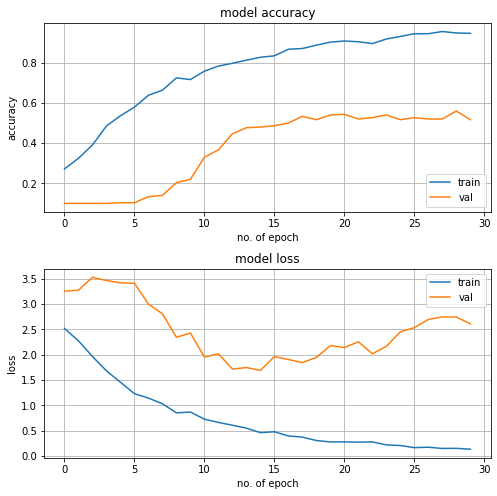

In [ ]:
# Plot and Save the training results
def plot_and_save_training():
    plt.figure(1, figsize=(8,8))
    # summarize history for accuracy
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('no. of epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid()

    # summarize history for loss
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('no. of epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    
    plt.savefig('/content/gdrive/MyDrive/Lip Reading/outputs/train_{}.pdf'.format(model_name))
    plt.show()

plot_and_save_training()

In [ ]:
!tensorboard dev upload \
  --logdir "/content/gdrive/MyDrive/Lip Reading/logs/" \
  --name "Lip Reading" \
  --description "" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/eaQ79ZOeQlCGEZf2ZbRBYg/

[2022-05-02T08:31:40] Started scanning logdir.
E0502 08:31:42.403608 139631475955584 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
W0502 08:31:42.404927 139631475955584 uploader.py:417] Mismatching plugin names for ('EF-3/train', 'conv3d_19/bias_0').  Expected histograms, found images.
W0502 08:31:42.405450 139631475955584 uploader.py:417] Mismatching plugin names for ('EF-3/train', 'conv3d_20/bias_0').  Expected histograms, found images.
W0502 08:31:42.405919 139631475955584 uploader.py:417] Mismatching plugin names for ('EF-3/train', 'conv3d_21/bias_0').  Expected histograms, found images.
W0502 08:31:42.406421 139631475955584 uploader.py:417] Mismatching plugin names for ('EF-3/train', 'conv3d_22/bias_0').  Expected histograms, found images.
W0502 08:31:42.406865 139631475955584 uploader.py:417] Mismatching plugin names for ('EF-3/train', 'dense_6/kerne

In [ ]:
print(history.history)


{'loss': [2.317340135574341, 2.3067636489868164, 2.3045847415924072, 2.300381660461426, 2.295853614807129, 2.2983877658843994, 2.255687713623047, 2.2650492191314697, 2.2264177799224854, 2.2051925659179688, 2.1645853519439697, 2.116419792175293, 2.055582284927368, 2.0563690662384033, 1.9214082956314087, 1.860731840133667, 1.7308342456817627, 1.630245327949524, 1.5208700895309448, 1.325079321861267, 1.1793712377548218, 0.9659121036529541, 0.9656537175178528, 0.7283129096031189, 0.5679492950439453, 0.4819214642047882, 0.29281964898109436, 0.27579817175865173, 0.218207448720932, 0.1721912920475006], 'accuracy': [0.10833333432674408, 0.09166666865348816, 0.09166666865348816, 0.11666666716337204, 0.10833333432674408, 0.14166666567325592, 0.15000000596046448, 0.13333334028720856, 0.21666666865348816, 0.14166666567325592, 0.19166666269302368, 0.25833332538604736, 0.21666666865348816, 0.21666666865348816, 0.30000001192092896, 0.3583333194255829, 0.34166666865348816, 0.4166666567325592, 0.449999

In [ ]:
print(history.history['val_loss'])

[2.3023571968078613, 2.3025169372558594, 2.303407907485962, 2.302844285964966, 2.29561448097229, 2.3370156288146973, 2.302779197692871, 2.304924488067627, 2.3947088718414307, 2.349304676055908, 2.5206501483917236, 2.468740701675415, 3.1461687088012695, 2.5927793979644775, 2.5223612785339355, 2.729816198348999, 2.2033796310424805, 2.5056490898132324, 3.4066152572631836, 2.2353386878967285, 2.4922902584075928, 3.5168511867523193, 2.610046148300171, 2.521003007888794, 2.8991713523864746, 3.137950897216797, 3.0615837574005127, 4.569421768188477, 4.334752082824707, 3.7355422973632812]


In [ ]:
model2.evaluate(X_train, y_train)

4/4 [==============================] - 19s 5s/step - loss: 0.0592 - accuracy: 0.9917


[0.05916200578212738, 0.9916666746139526]

In [ ]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 5s 5s/step - loss: 3.6667 - accuracy: 0.2333


[3.666743516921997, 0.23333333432674408]

In [ ]:
model2.predict(X_test)

array([[8.00419948e-04, 6.17629098e-07, 2.16948771e-04, 2.34546678e-04,
        9.97998178e-01, 5.67119514e-06, 8.55397302e-05, 1.23157719e-04,
        9.69814027e-06, 5.25079900e-04],
       [1.61682419e-05, 1.04242490e-05, 6.11473661e-06, 8.72878957e-07,
        3.80776287e-03, 1.82151723e-06, 3.39504368e-05, 9.39548761e-02,
        4.29527499e-05, 9.02125120e-01],
       [1.07495949e-01, 6.99203592e-05, 1.40729535e-03, 2.65635055e-04,
        8.65741313e-01, 8.60181171e-05, 7.51064101e-04, 3.40097795e-05,
        4.19666030e-05, 2.41069738e-02],
       [4.14197362e-04, 1.64962821e-02, 1.59614079e-03, 9.32501978e-04,
        1.60841946e-03, 1.82333414e-03, 1.04411401e-01, 2.48878419e-01,
        2.49678735e-02, 5.98871469e-01],
       [9.80351018e-08, 1.47174092e-06, 9.57460543e-06, 1.89697102e-03,
        5.28768776e-03, 1.14549764e-01, 5.05891256e-03, 7.90547907e-01,
        8.24822336e-02, 1.65434423e-04],
       [2.09620099e-09, 1.65202589e-08, 2.73600120e-09, 3.85231897e-06,
   

In [ ]:
y_predicted = model2.predict(X_test)